### Bienvenido al nacimiento del agente Willy, para iniciar se cargan las librerias necesarias

In [0]:
!pip install h5py

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline
from sklearn import linear_model
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import multilabel_confusion_matrix, precision_score
from xgboost import XGBClassifier
import numpy as np
import seaborn as sn
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.layers import Dense, Dropout
from keras import backend
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam, SGD
import numpy
import yellowbrick
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ConfusionMatrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Se carga el set de datos con el que Willy aprenderá a clasificar.

In [0]:
dataset = pd.read_csv('/content/gdrive/My Drive/Accidentesfa.csv',engine='python', sep=';', encoding = 'latin-1')

Para Willy será mas sencillo entender los datos teniendo éstos formas numéricas, para ello se codificarán con el fin de facilitarle a Willy su aprendizaje

In [0]:
encoder = LabelEncoder()

In [0]:
dataset['Localidad']=encoder.fit_transform(dataset.Localidad.values)
dataset['Dia']=encoder.fit_transform(dataset.Dia.values)
dataset['TipoVia1']=encoder.fit_transform(dataset.TipoVia1.values)
dataset['NumeroVia1']=encoder.fit_transform(dataset.NumeroVia1.values)
dataset['LetraVia1']=encoder.fit_transform(dataset.LetraVia1.values)
dataset['CardinalVia1']=encoder.fit_transform(dataset.CardinalVia1.values)
dataset['TipoVia2']=encoder.fit_transform(dataset.TipoVia2.values)
dataset['LetraVia2']=encoder.fit_transform(dataset.LetraVia2.values)
dataset['CardinalVia2']=encoder.fit_transform(dataset.CardinalVia2.values)
dataset['Municipio']=encoder.fit_transform(dataset.Municipio.values)
dataset['TipoDiseno']=encoder.fit_transform(dataset.TipoDiseno.values)
dataset['TipoTiempo']=encoder.fit_transform(dataset.TipoTiempo.values)
dataset['CorredorVial']=encoder.fit_transform(dataset.CorredorVial.values)
dataset['LLevaCinturon']=encoder.fit_transform(dataset.LLevaCinturon.values)
dataset['LLevaChaleco']=encoder.fit_transform(dataset.LLevaChaleco.values)
dataset['LLevaCasco']=encoder.fit_transform(dataset.LLevaCasco.values)
dataset['Sexo']=encoder.fit_transform(dataset.Sexo.values)
dataset['PortaLicencia']=encoder.fit_transform(dataset.PortaLicencia.values)
dataset['CodigoCategoriaLicencia']=encoder.fit_transform(dataset.CodigoCategoriaLicencia.values)
dataset['CodigoRestriccionLicencia']=encoder.fit_transform(dataset.CodigoRestriccionLicencia.values)
dataset['CausaConductorICo']=encoder.fit_transform(dataset.CausaConductorICo.values)
dataset['VehiculoEnFuga']=encoder.fit_transform(dataset.VehiculoEnFuga.values)
dataset['CodigoMarcaVehiculo']=encoder.fit_transform(dataset.CodigoMarcaVehiculo.values)
dataset['ClaseVehiculo']=encoder.fit_transform(dataset.ClaseVehiculo.values)
dataset['ServicioVehiculo']=encoder.fit_transform(dataset.ServicioVehiculo.values)
dataset['ModalidadVehiculo']=encoder.fit_transform(dataset.ModalidadVehiculo.values)
dataset['TipoFalla']=encoder.fit_transform(dataset.TipoFalla.values)
dataset['ANO']=encoder.fit_transform(dataset.ANO.values)
dataset['ModeloVehiculo']=encoder.fit_transform(dataset.ModeloVehiculo.values)
dataset['EDAD_PROCESADA']=encoder.fit_transform(dataset.EDAD_PROCESADA.values)

Los datos de entremiento serán todos los que son diferentes de ID_Accidente y GravedadCod, GravedadCod será la variable de salida, asi que Willy tendrá que aprender a predecir GravedadCod. En la siguiente linea se hace la asignación de x y y

In [0]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 49:50].values

Codificacion en caliente

In [7]:
encoder.fit(y)
encoded_Y = encoder.transform(y)
temp_y = np_utils.to_categorical(encoded_Y, num_classes=3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Se divide el set de datos en entrenamiento y test, con una distribución 80% 20% respectivamente

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, temp_y, test_size = 0.2)

In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2)

In [10]:
print('Tamano de X_train: ',X_train.shape)
print('Tamano de X_test: ',X_test.shape)
print('Tamano de y_train: ',y_train.shape)
print('Tamano de y_test: ', y_test.shape)

Tamano de X_train:  (52466, 48)
Tamano de X_test:  (13117, 48)
Tamano de y_train:  (52466, 3)
Tamano de y_test:  (13117, 3)


Se crea el primer modelo secuencial de Keras

In [11]:
model_1 = Sequential()
model_1.add(Dense(8, activation='relu', input_dim=48))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(3, activation='softmax'))
model_1.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 392       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 7,771
Trainable params: 7,771
Non-trainable params: 0
_________________________________________________________________


Distribución de las capas ocultas

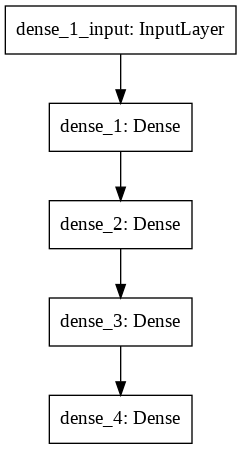

In [12]:
plot_model(model_1, 'model_1.png')

Entradas y salidas de las capas ocultas

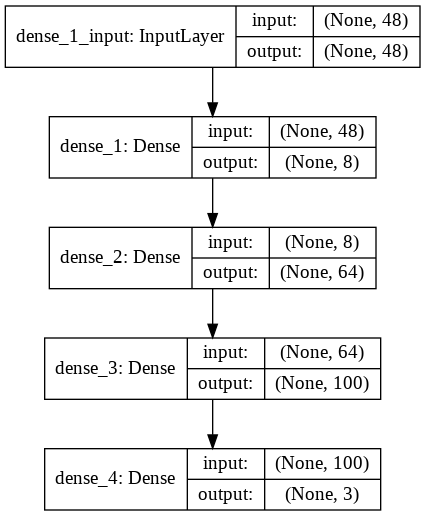

In [13]:
plot_model(model_1, 'model_1_shape.png', show_shapes=True)

Se compila el modelo para inicial el entrenamiento

In [14]:
model_1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['acc'])

Se inicial el entrenamiento del modelo utilizando 30 épocas

In [15]:
history_1 = model_1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 52466 samples, validate on 13117 samples
Epoch 1/30





52466/52466 [==============================] - 1s 25us/step - loss: 5.4496 - acc: 0.6613 - val_loss: 5.3956 - val_acc: 0.6652
Epoch 2/30
52466/52466 [==============================] - 1s 15us/step - loss: 5.4527 - acc: 0.6617 - val_loss: 5.3956 - val_acc: 0.6652
Epoch 3/30
52466/52466 [==============================] - 1s 15us/step - loss: 5.4527 - acc: 0.6617 - val_loss: 5.3956 - val_acc: 0.6652
Epoch 4/30
52466/52466 [==============================] - 1s 15us/step - loss: 5.4527 - acc: 0.6617 - val_loss: 5.3956 - val_acc: 0.6652
Epoch 5/30
52466/52466 [==============================] - 1s 15us/step - loss: 5.4527 - acc: 0.6617 - val_loss: 5.3956 - val_acc: 0.6652
Epoch 6/30
52466/52466 [==============================] - 1s 15us/step - loss: 5.4527 - acc: 0.6617 - val_loss: 5.3956 - val_acc: 0.6652
Epoch 7/30
52466/52466 [==

In [16]:
score = model_1.evaluate(X_train, y_train)
print(score)

52466/52466 [==============================] - 1s 20us/step
[5.452675569772275, 0.6617047230655592]


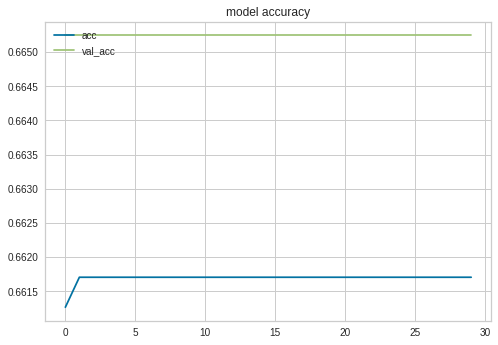

In [17]:
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

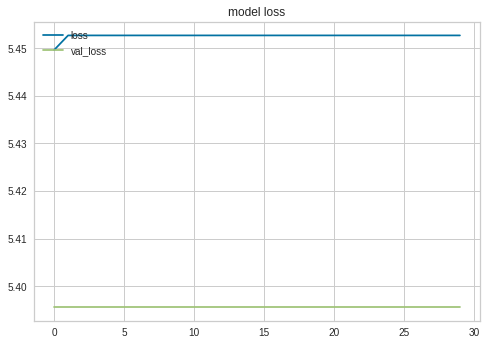

In [18]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()

In [19]:
model_2 = Sequential()
model_2.add(Dense(50, activation='relu', input_dim=48))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(3, activation='softmax'))
model_2.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                2450      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                3264      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 303       
Tota

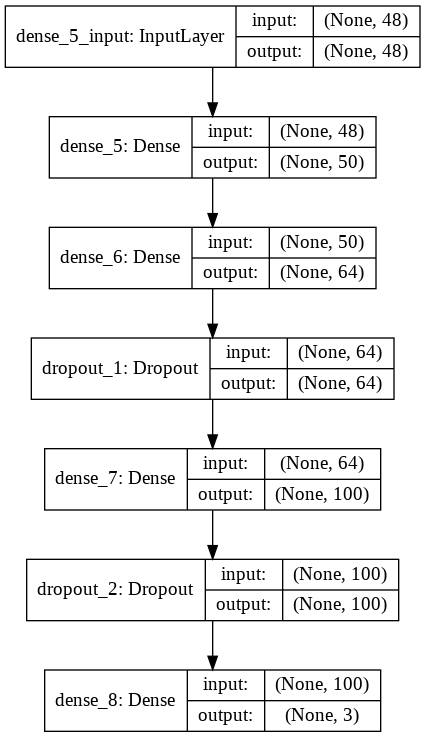

In [20]:
plot_model(model_2, 'model_2_shape.png', show_shapes=True)

In [0]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [22]:
history_2 = model_2.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose=1, batch_size=128)

Train on 52466 samples, validate on 13117 samples
Epoch 1/15
52466/52466 [==============================] - 1s 28us/step - loss: 4.0054 - acc: 0.7225 - val_loss: 2.4724 - val_acc: 0.7528
Epoch 2/15
52466/52466 [==============================] - 1s 20us/step - loss: 0.8102 - acc: 0.7380 - val_loss: 0.6786 - val_acc: 0.7590
Epoch 3/15
52466/52466 [==============================] - 1s 21us/step - loss: 0.6645 - acc: 0.7595 - val_loss: 0.6414 - val_acc: 0.7630
Epoch 4/15
52466/52466 [==============================] - 1s 21us/step - loss: 0.6536 - acc: 0.7622 - val_loss: 0.6379 - val_acc: 0.7648
Epoch 5/15
52466/52466 [==============================] - 1s 21us/step - loss: 0.6020 - acc: 0.7613 - val_loss: 0.5654 - val_acc: 0.7660
Epoch 6/15
52466/52466 [==============================] - 1s 21us/step - loss: 0.5741 - acc: 0.7656 - val_loss: 0.5666 - val_acc: 0.7685
Epoch 7/15
52466/52466 [==============================] - 1s 21us/step - loss: 0.5676 - acc: 0.7678 - val_loss: 0.5549 - val_acc

In [23]:
score = model_2.evaluate(X_train, y_train)
print(score)

52466/52466 [==============================] - 1s 22us/step
[0.5192437933177302, 0.7822780467395727]


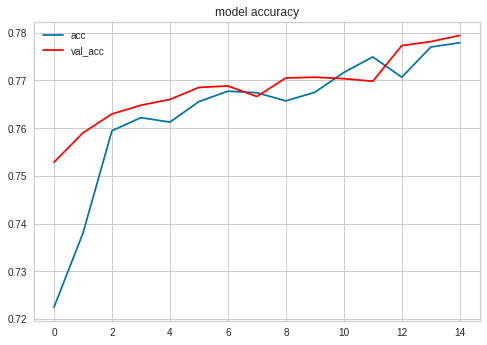

In [24]:
plt.plot(history_2.history['acc'], color='b')
plt.plot(history_2.history['val_acc'], color='red')
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

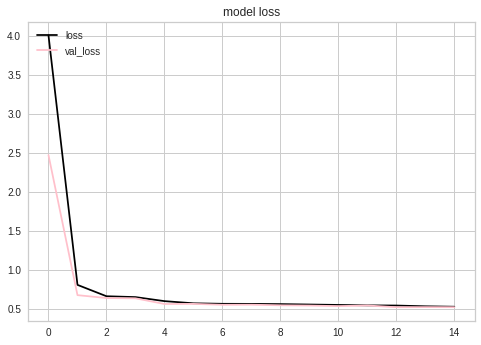

In [25]:
plt.plot(history_2.history['loss'], color='black')
plt.plot(history_2.history['val_loss'], color='pink')
plt.title('model loss')
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()

In [26]:
model_3 = Sequential()
model_3.add(Dense(50, activation='relu', input_dim=48))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(3, activation='softmax'))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                2450      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 303       
Total params: 17,953
Trainable params: 17,953
Non-trainable params: 0
__________________________________________________

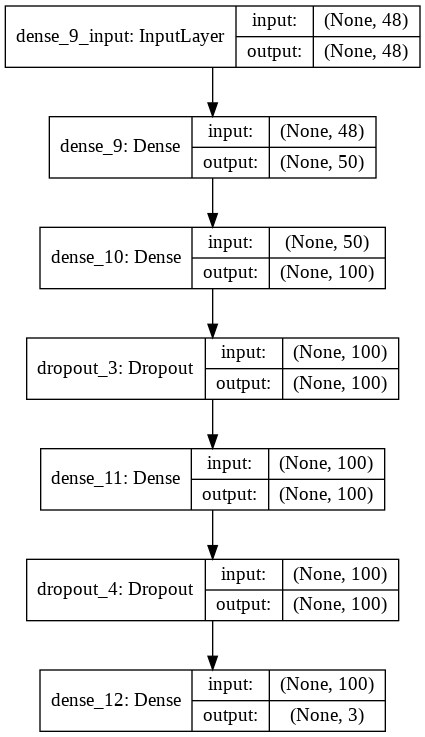

In [27]:
plot_model(model_3, 'model_3_shape.png', show_shapes=True)

In [0]:
model_3.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['acc','mse'])

In [29]:
history_3 = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1, batch_size=8)

Train on 52466 samples, validate on 13117 samples
Epoch 1/20
52466/52466 [==============================] - 13s 239us/step - loss: 9.7336 - acc: 0.3949 - mean_squared_error: 0.4033 - val_loss: 10.9817 - val_acc: 0.3187 - val_mean_squared_error: 0.4542
Epoch 2/20
52466/52466 [==============================] - 12s 232us/step - loss: 10.6733 - acc: 0.3377 - mean_squared_error: 0.4415 - val_loss: 10.9817 - val_acc: 0.3187 - val_mean_squared_error: 0.4542
Epoch 3/20
52466/52466 [==============================] - 12s 228us/step - loss: 10.9296 - acc: 0.3219 - mean_squared_error: 0.4521 - val_loss: 10.9817 - val_acc: 0.3187 - val_mean_squared_error: 0.4542
Epoch 4/20
52466/52466 [==============================] - 12s 227us/step - loss: 10.9299 - acc: 0.3219 - mean_squared_error: 0.4521 - val_loss: 10.9817 - val_acc: 0.3187 - val_mean_squared_error: 0.4542
Epoch 5/20
52466/52466 [==============================] - 12s 226us/step - loss: 10.9299 - acc: 0.3219 - mean_squared_error: 0.4521 - val_l

In [30]:
score = model_3.evaluate(X_train, y_train)
print(score)

52466/52466 [==============================] - 1s 22us/step
[10.929927900417068, 0.32188464910949594, 0.452076915199265]


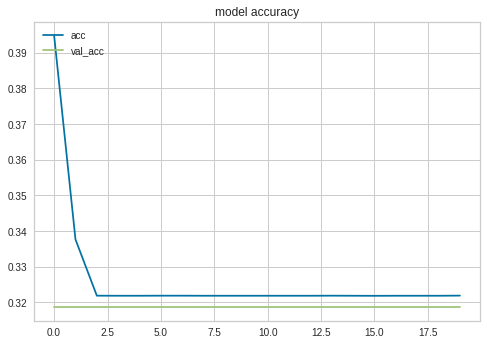

In [31]:
plt.plot(history_3.history['acc'], color='b')
plt.plot(history_3.history['val_acc'], color='g')
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

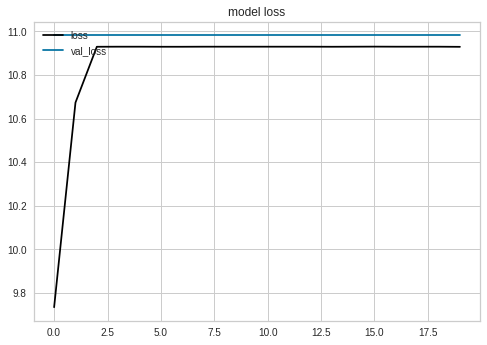

In [32]:
plt.plot(history_3.history['loss'], color='black')
plt.plot(history_3.history['val_loss'], color='b')
plt.title('model loss')
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()

In [33]:
seed = 7
numpy.random.seed(seed)
def baseline_model():
  model_4 = Sequential()
  model_4.add(Dense(8, input_dim=48, activation='relu'))
  model_4.add(Dense(100, activation='relu'))
  model_4.add(Dropout(0.2))
  model_4.add(Dense(64, activation='relu'))
  model_4.add(Dropout(0.2))
  model_4.add(Dense(64, activation='relu'))
  model_4.add(Dropout(0.2))
  model_4.add(Dense(3, activation='softmax'))
  model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return model_4
estimator = KerasClassifier(build_fn=baseline_model, epochs=15, batch_size=8,verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 80.23% (1.12%)


In [34]:
history_4 = estimator.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, verbose=1, batch_size=8)

Train on 52466 samples, validate on 13117 samples
Epoch 1/20
52466/52466 [==============================] - 16s 314us/step - loss: 1.0755 - acc: 0.7377 - val_loss: 0.5903 - val_acc: 0.7547
Epoch 2/20
52466/52466 [==============================] - 14s 276us/step - loss: 0.5987 - acc: 0.7560 - val_loss: 0.5880 - val_acc: 0.7572
Epoch 3/20
52466/52466 [==============================] - 14s 273us/step - loss: 0.5890 - acc: 0.7602 - val_loss: 0.5773 - val_acc: 0.7607
Epoch 4/20
52466/52466 [==============================] - 14s 271us/step - loss: 0.5838 - acc: 0.7632 - val_loss: 0.5771 - val_acc: 0.7658
Epoch 5/20
52466/52466 [==============================] - 15s 279us/step - loss: 0.5742 - acc: 0.7670 - val_loss: 0.5484 - val_acc: 0.7658
Epoch 6/20
52466/52466 [==============================] - 14s 275us/step - loss: 0.5436 - acc: 0.7810 - val_loss: 0.5136 - val_acc: 0.7978
Epoch 7/20
52466/52466 [==============================] - 15s 280us/step - loss: 0.5230 - acc: 0.7974 - val_loss: 0.

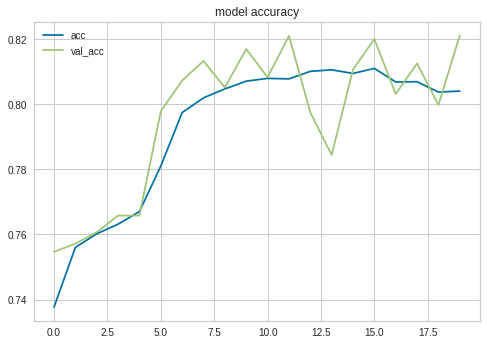

In [35]:
plt.plot(history_4.history['acc'], color='b')
plt.plot(history_4.history['val_acc'], color='g')
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

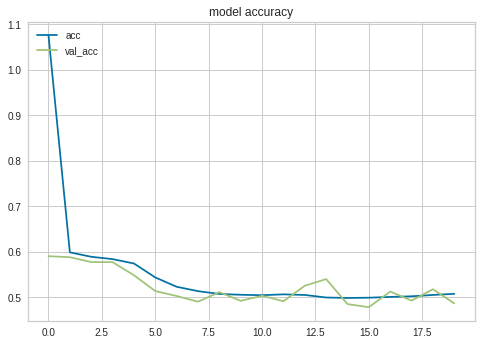

In [36]:
plt.plot(history_4.history['loss'], color='b')
plt.plot(history_4.history['val_loss'], color='g')
plt.title('model accuracy')
plt.legend(['acc','val_acc'],loc='upper left')
plt.show()

In [0]:
model_5 = DecisionTreeClassifier(criterion = 'entropy')

In [38]:
model_5.fit(X_train_2, y_train_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred_5 = model_5.predict(X_test_2)

In [0]:
conf_mat_5 = confusion_matrix(y_test_2, y_pred_5)

[[  26  143   45]
 [ 168 2674 1328]
 [  59 1451 7223]]


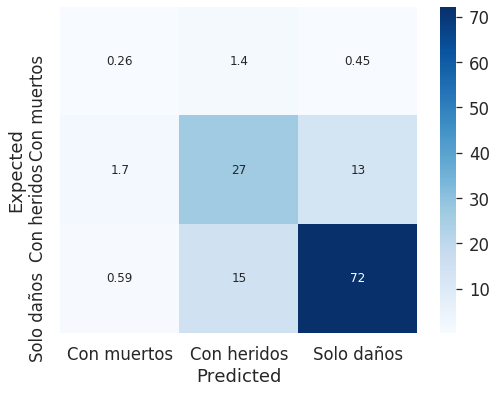

In [41]:
labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
print(conf_mat_5)
sn.heatmap(conf_mat_5/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [42]:
cores = cross_val_score(model_5, X_train_2, y_train_2, cv = 5)
print("Mean cross-validation score: %.2f%%" % cores.mean())

Mean cross-validation score: 0.76%


In [43]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model_5, X_train_2, y_train_2, cv=kfold )
print("K-fold CV average score: %.2f%%" % kf_cv_scores.mean())

K-fold CV average score: 0.76%


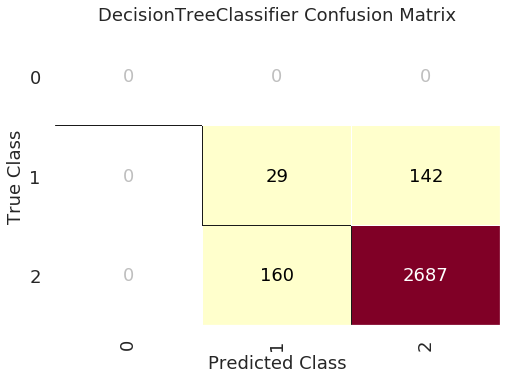

In [44]:
cm = ConfusionMatrix(model_5, classes=[0,1,2])
cm.fit(X_train_2, y_train_2)
cm.score(X_test_2, y_test_2)
cm.poof()

In [45]:
precision_5 = precision_score(y_test_2, y_pred_5, average=None)
precision_5

array([0.1027668 , 0.62652296, 0.84027455])

In [46]:
model_6 = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_2, y_train_2).predict(X_train_2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
model_7 = XGBClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1)
model_7.fit(X_train_2, y_train_2)
y_pred_7 = model_7.predict(X_test_2)

accuracy = accuracy_score(y_test_2, y_pred_7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 83.12%


[[   1  150   63]
 [   1 2479 1690]
 [   0  310 8423]]


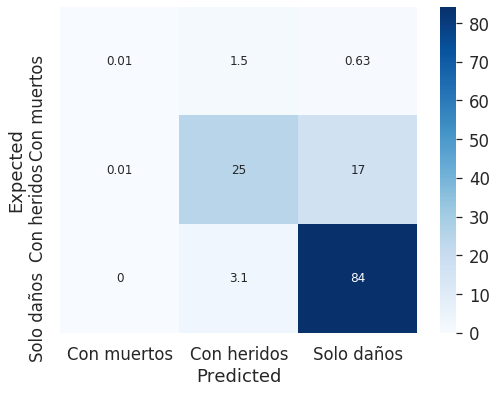

              precision    recall  f1-score   support

           1       0.50      0.00      0.01       214
           2       0.84      0.59      0.70      4170
           3       0.83      0.96      0.89      8733

    accuracy                           0.83     13117
   macro avg       0.72      0.52      0.53     13117
weighted avg       0.83      0.83      0.82     13117



In [48]:
conf_mat_7 = confusion_matrix(y_test_2, y_pred_7)
labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
print(conf_mat_7)
sn.set(font_scale=1.5) # for label size
sn.heatmap(conf_mat_7/100, annot=True, annot_kws={"size": 12}, cmap = plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_7))

In [49]:
model_8 = OneVsRestClassifier(LinearSVC(random_state=0))
model_8.fit(X_train_2, y_train_2)
y_pred_8 = model_8.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


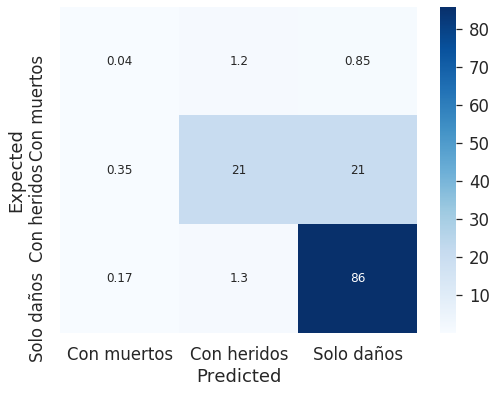

              precision    recall  f1-score   support

           1       0.07      0.02      0.03       214
           2       0.89      0.49      0.63      4170
           3       0.80      0.98      0.88      8733

    accuracy                           0.81     13117
   macro avg       0.59      0.50      0.52     13117
weighted avg       0.82      0.81      0.79     13117



In [50]:
conf_mat_8 = confusion_matrix(y_test_2, y_pred_8)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_8/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_8))

In [52]:
model_9 = RandomForestClassifier()
model_9.fit(X_train_2, y_train_2)
y_pred_9 = model_9.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


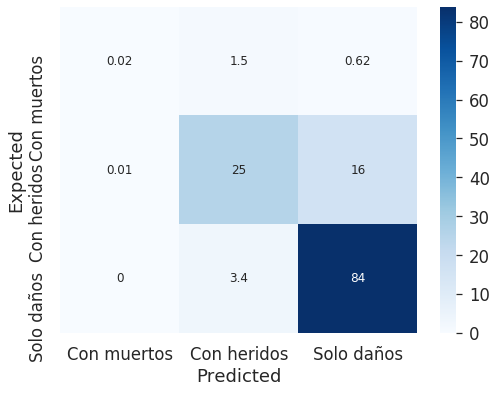

              precision    recall  f1-score   support

           1       0.67      0.01      0.02       214
           2       0.84      0.61      0.71      4170
           3       0.83      0.96      0.89      8733

    accuracy                           0.83     13117
   macro avg       0.78      0.53      0.54     13117
weighted avg       0.83      0.83      0.82     13117



In [53]:
conf_mat_9 = confusion_matrix(y_test_2, y_pred_9)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_9/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_9))

In [54]:
model_10 = KNeighborsClassifier()
model_10.fit(X_train_2, y_train_2)
y_pred_10 = model_10.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[   0  120   94]
 [  15 2139 2016]
 [   5  928 7800]]


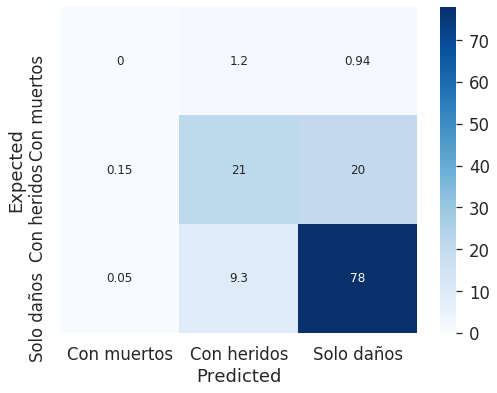

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       214
           2       0.67      0.51      0.58      4170
           3       0.79      0.89      0.84      8733

    accuracy                           0.76     13117
   macro avg       0.49      0.47      0.47     13117
weighted avg       0.74      0.76      0.74     13117



In [55]:
conf_mat_10 = confusion_matrix(y_test_2, y_pred_10)
print(conf_mat_10)
labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_10/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_10))

In [56]:
model_10 = MLPClassifier()
model_10.fit(X_train_2, y_train_2)
y_pred_10 = model_10.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


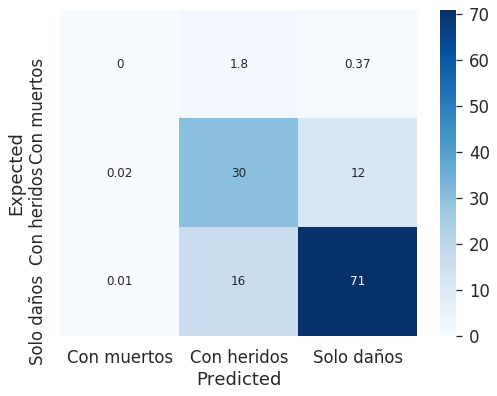

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       214
           2       0.62      0.72      0.67      4170
           3       0.85      0.81      0.83      8733

    accuracy                           0.77     13117
   macro avg       0.49      0.51      0.50     13117
weighted avg       0.77      0.77      0.77     13117



In [57]:
conf_mat_10 = confusion_matrix(y_test_2, y_pred_10)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_10/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_10))

In [58]:
model_11 = NearestCentroid()
model_11.fit(X_train_2, y_train_2)
y_pred_11 = model_11.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


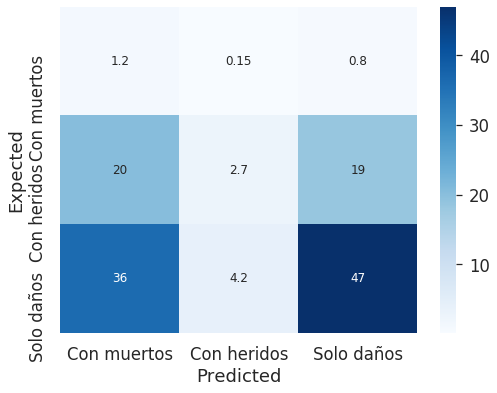

              precision    recall  f1-score   support

           1       0.02      0.56      0.04       214
           2       0.39      0.07      0.11      4170
           3       0.71      0.54      0.61      8733

    accuracy                           0.39     13117
   macro avg       0.37      0.39      0.25     13117
weighted avg       0.60      0.39      0.44     13117



In [59]:
conf_mat_11 = confusion_matrix(y_test_2, y_pred_11)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_11/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_11))

In [60]:
model_12 = LogisticRegression(multi_class='multinomial')
model_12.fit(X_train_2, y_train_2)
y_pred_12 = model_12.predict(X_test_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


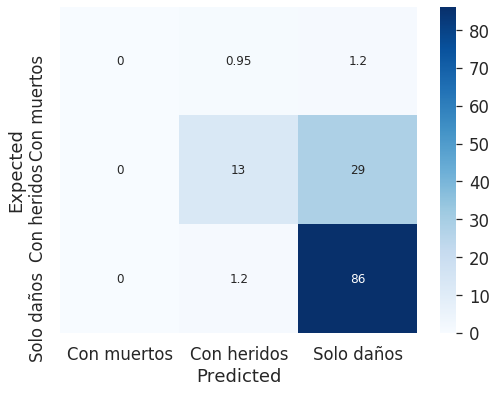

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       214
           2       0.86      0.31      0.46      4170
           3       0.74      0.99      0.85      8733

    accuracy                           0.76     13117
   macro avg       0.53      0.43      0.44     13117
weighted avg       0.77      0.76      0.71     13117



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
conf_mat_12 = confusion_matrix(y_test_2, y_pred_12)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_12/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_12))

In [0]:
model_13 = ExtraTreeClassifier(random_state=0)
model_13.fit(X_train_2, y_train_2)
y_pred_13 = model_13.predict(X_test_2)

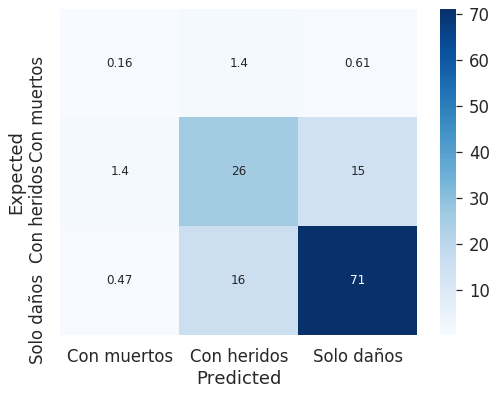

              precision    recall  f1-score   support

           1       0.08      0.07      0.08       214
           2       0.60      0.62      0.61      4170
           3       0.82      0.81      0.82      8733

    accuracy                           0.74     13117
   macro avg       0.50      0.50      0.50     13117
weighted avg       0.74      0.74      0.74     13117



In [63]:
conf_mat_13 = confusion_matrix(y_test_2, y_pred_13)
labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_13/100, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
print (classification_report(y_test_2, y_pred_13))

In [64]:
model_14 = XGBClassifier()
model_14.fit(X_train_2, y_train_2)
y_pred_14 = model_14.predict(X_test_2)

accuracy = accuracy_score(y_test_2, y_pred_14)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 83.12%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


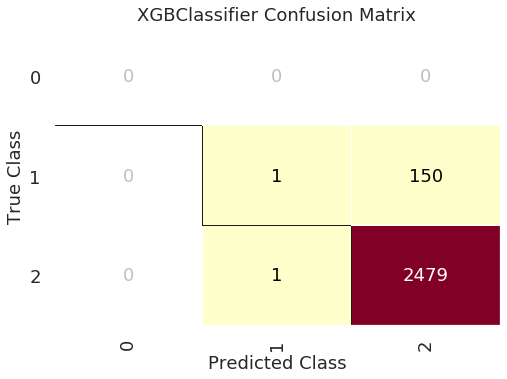

In [65]:
cm = ConfusionMatrix(model_14, classes=[0,1,2])
cm.fit(X_train_2, y_train_2)
cm.score(X_test_2, y_test_2)
cm.poof()

In [66]:
multi_clf = OneVsOneClassifier(Perceptron(shuffle=False))
ovo_prediction = multi_clf.fit(X_train_2, y_train_2).predict(X_train_2)
ovo_decision = multi_clf.decision_function(X_train_2)
print(ovo_decision)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 2.3333333   1.33333331 -0.33333332]
 [-0.3333333   0.66666711  2.33333331]
 [-0.33333323  0.66666744  2.33333324]
 ...
 [-0.3333333   0.66666682  2.33333331]
 [-0.33333328  1.33333287  2.33333327]
 [-0.3333333   0.66666696  2.3333333 ]]


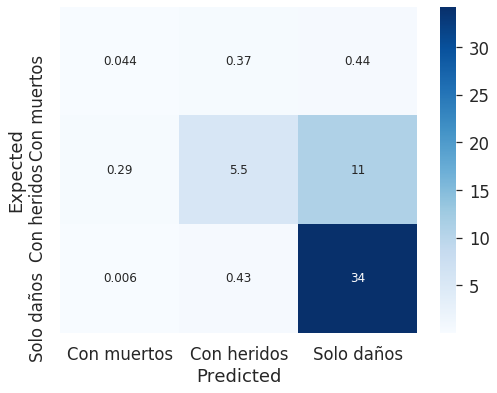

In [67]:
conf_mat_15 = confusion_matrix(y_train_2, ovo_prediction)

labels = ['Con muertos', 'Con heridos','Solo daños']
plt.figure(figsize=(8, 6))
sn.set(font_scale=1.5)
sn.heatmap(conf_mat_15/1000, annot=True, annot_kws={"size": 12}, cmap=plt.cm.Blues, xticklabels=labels, yticklabels=labels) # font size
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [0]:
Willy = '/content/gdrive/My Drive/Willy.h5'

In [0]:
Willy_2 = '/content/gdrive/My Drive/Willy_2.h5'

In [0]:
estimator.model.save(Willy)

In [0]:
model_7.save_model(Willy_2)

In [0]:
path_model = '/content/gdrive/My Drive/Willy.h5'

In [0]:
path_model_2 = '/content/gdrive/My Drive/Willy_2.h5'

In [0]:
new_model = load_model(path_model)

In [72]:
new_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 8)                 392       
_________________________________________________________________
dense_64 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_35 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 64)                6464      
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)              

In [0]:
y_pred2 = new_model.predict(x=X_test)

# Obtencion de las etiquetas predichas
cls_pred2 = np.argmax(y_pred2,axis=1)

In [74]:
# Obtencion de las etiquetas verdaderas
true_labels2 = np.argmax(y_test,axis=1)

# Obtencion vector booleano para ver que posiciones coinciden
possitions = cls_pred2 == true_labels2

# Numero de prediciones correctas dividido entre todas las prediciones
precision = sum(possitions)/len(true_labels2)

print("Precision : {0}%".format(precision))

Precision : 0.8211481283830144%


In [0]:
encoder.fit(cls_pred2)
encoded_r = encoder.transform(cls_pred2)
temp_cls_pred2 = np_utils.to_categorical(encoded_r, num_classes=3)

In [98]:
multilabel_confusion_matrix(y_test, temp_cls_pred2)

array([[[10419,  2487],
        [   70,   141]],

       [[  362,  8575],
        [ 2266,  1914]],

       [[ 4391,     0],
        [ 8726,     0]]])